In [1]:
from random import expovariate, gauss
from matplotlib.pyplot import *
from heapq import heappush, heappop
from statistics import mean, median, stdev

In [2]:
Avg_IAT = 2.0 # Average IAT
Sim_Time = 100 # Total simulation time

N = 0 # Count number of arrivals

clock = 0 # Simulation time

while clock <= Sim_Time:
    N = N + 1
    # Advance simulation clock
    clock = clock + expovariate(1/Avg_IAT)

print('Total Number of Arrivals = ', N)

Total Number of Arrivals =  52


In [3]:
from heapq import heappush, heappop
from random import expovariate, gauss
from statistics import mean, median, stdev

average_arrival_interval = 5.6
average_service_time = 15.0
stdev_service_time = 3.5
num_servers = 3

waits = []
arrival_time = 0.0
servers = [0.0] * num_servers  # time when each server becomes available
for i in range(100_000):
    arrival_time += expovariate(1.0 / average_arrival_interval)
    next_server_available = heappop(servers)
    wait = max(0.0, next_server_available - arrival_time)
    waits.append(wait)
    service_duration = gauss(average_service_time, stdev_service_time)
    service_completed = arrival_time + wait + service_duration
    heappush(servers, service_completed)

print(f'Mean wait: {mean(waits):.1f}.  Stdev wait: {stdev(waits):.1f}.')
print(f'Median wait: {median(waits):.1f}.  Max wait: {max(waits):.1f}.')

Mean wait: 19.7.  Stdev wait: 22.3.
Median wait: 12.7.  Max wait: 162.0.


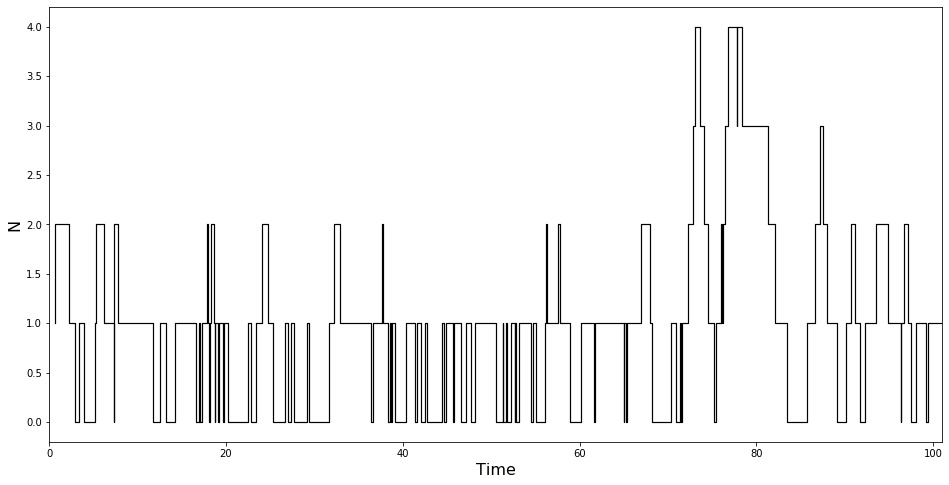

In [4]:

Avg_IAT = 2.0

Avg_ST = 1.0 # Avg service time
Sim_Time = 100 # Total simulation time

N = 0
clock = 0 # Simulation time
X = [] # Times of events
Y = [] # Values of N

while clock <= Sim_Time:
    IAT = expovariate(1 / Avg_IAT)
    ST = expovariate(1 / Avg_ST)
    if IAT <= ST:
        N += 1
        clock = clock + IAT
        X.append(clock)
        Y.append(N)
    else:
        if N > 0:
            N -= 1
            clock = clock + ST
            X.append(clock)
            Y.append(N)

fig = figure(1, figsize=(16, 8))
step(X, Y, Linewidth=1.2, color='black')
xlabel('Time', size=16)
ylabel('N', size=16)
xlim(0, 101)
show()
#savefig(’sim_birth_death_process.pdf’, format=’pdf’, bbox_inches=’tight’)